<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/main/Circuit_Identification_Updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import missingno as mn
from pandas_datareader import data as pdr
import numpy as np

In [ ]:
stock_list= ['YESBANK', 'SALASAR','TTML','APTUS', 'ASIANENE', 'MANGCHEFER','ELECTHERM','RENUKA', 'PRESSMN', 'APLLTD','PCJEWELLER',
             'PODDARHOUS', 'MBLINFRA', 'KAMDHENU','SGL', 'OILCOUNTUB','SUULD', 'KSHITIJPOL','CONSOFINVT']

In [ ]:
len(stock_list)

19

In [ ]:
for i in range(len(stock_list)):
  stock_list[i] += '.NS'
stock_list

['YESBANK.NS',
 'SALASAR.NS',
 'TTML.NS',
 'APTUS.NS',
 'ASIANENE.NS',
 'MANGCHEFER.NS',
 'ELECTHERM.NS',
 'RENUKA.NS',
 'PRESSMN.NS',
 'APLLTD.NS',
 'PCJEWELLER.NS',
 'PODDARHOUS.NS',
 'MBLINFRA.NS',
 'KAMDHENU.NS',
 'SGL.NS',
 'OILCOUNTUB.NS',
 'SUULD.NS',
 'KSHITIJPOL.NS',
 'CONSOFINVT.NS']

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

data = pdr.get_data_yahoo(stock_list, start="2023-03-01", end="2023-03-08",interval="1m")

[*********************100%***********************]  19 of 19 completed


In [ ]:
data

Adj Close                                        \
                            APLLTD.NS    APTUS.NS ASIANENE.NS CONSOFINVT.NS   
Datetime                                                                      
2023-03-01 09:15:00+05:30  510.049988  244.100006   56.049999           NaN   
2023-03-01 09:16:00+05:30  510.000000  243.850006   56.200001           NaN   
2023-03-01 09:17:00+05:30  510.450012  243.250000   56.000000           NaN   
2023-03-01 09:18:00+05:30  510.299988  243.699997         NaN           NaN   
2023-03-01 09:19:00+05:30  510.500000  243.350006   55.950001           NaN   
...                               ...         ...         ...           ...   
2023-03-06 15:25:00+05:30  525.000000  283.700012   79.199997    112.000000   
2023-03-06 15:26:00+05:30  525.500000  283.700012         NaN           NaN   
2023-03-06 15:27:00+05:30  526.750000  283.700012         NaN    112.000000   
2023-03-06 15:28:00+05:30  524.500000  283.700012   78.900002    112.300003   
2023-03-06 15:29:00+05:30  526.000000  280.500000         NaN    111.900002   

                                                                  \
                          ELECTHERM.NS KAMDHENU.NS KSHITIJPOL.NS   
Datetime                                                           
2023-03-01 09:15:00+05:30          NaN  333.799988     20.900000   
2023-03-01 09:16:00+05:30          NaN  332.100006     20.900000   
2023-03-01 09:17:00+05:30          NaN  332.049988     20.900000   
2023-03-01 09:18:00+05:30          NaN  333.899994     20.900000   
2023-03-01 09:19:00+05:30          NaN  334.750000     20.900000   
...                                ...         ...           ...   
2023-03-06 15:25:00+05:30    64.000000  324.649994     21.549999   
2023-03-06 15:26:00+05:30    64.000000  324.899994     21.549999   
2023-03-06 15:27:00+05:30    63.900002  324.899994     21.549999   
2023-03-06 15:28:00+05:30    63.700001  324.950012     21.549999   
2023-03-06 15:29:00+05:30    63.750000  324.399994     21.549999   

                                                                   ...  \
                          MANGCHEFER.NS MBLINFRA.NS OILCOUNTUB.NS  ...   
Datetime                                                           ...   
2023-03-01 09:15:00+05:30     75.000000   16.299999         14.15  ...   
2023-03-01 09:16:00+05:30     74.650002   17.250000           NaN  ...   
2023-03-01 09:17:00+05:30     74.349998         NaN           NaN  ...   
2023-03-01 09:18:00+05:30     74.400002   17.150000         14.80  ...   
2023-03-01 09:19:00+05:30           NaN         NaN         14.80  ...   
...                                 ...         ...           ...  ...   
2023-03-06 15:25:00+05:30     88.400002         NaN           NaN  ...   
2023-03-06 15:26:00+05:30     88.099998         NaN           NaN  ...   
2023-03-06 15:27:00+05:30     88.300003         NaN           NaN  ...   
2023-03-06 15:28:00+05:30     88.650002         NaN         17.00  ...   
2023-03-06 15:29:00+05:30     88.500000         NaN           NaN  ...   

                                 Volume                              \
                          OILCOUNTUB.NS PCJEWELLER.NS PODDARHOUS.NS   
Datetime                                                              
2023-03-01 09:15:00+05:30           0.0           0.0           0.0   
2023-03-01 09:16:00+05:30           NaN      104867.0        4057.0   
2023-03-01 09:17:00+05:30           NaN      221451.0         334.0   
2023-03-01 09:18:00+05:30          97.0      239918.0         156.0   
2023-03-01 09:19:00+05:30         102.0      143522.0         148.0   
...                                 ...           ...           ...   
2023-03-06 15:25:00+05:30           NaN           NaN          22.0   
2023-03-06 15:26:00+05:30           NaN           NaN           NaN   
2023-03-06 15:27:00+05:30           NaN           0.0           NaN   
2023-03-06 15:28:00+05:30       19154.0         414.0           NaN   
2023-03-

In [ ]:
data.to_csv("pennystocks.csv",index=True)

<AxesSubplot:>

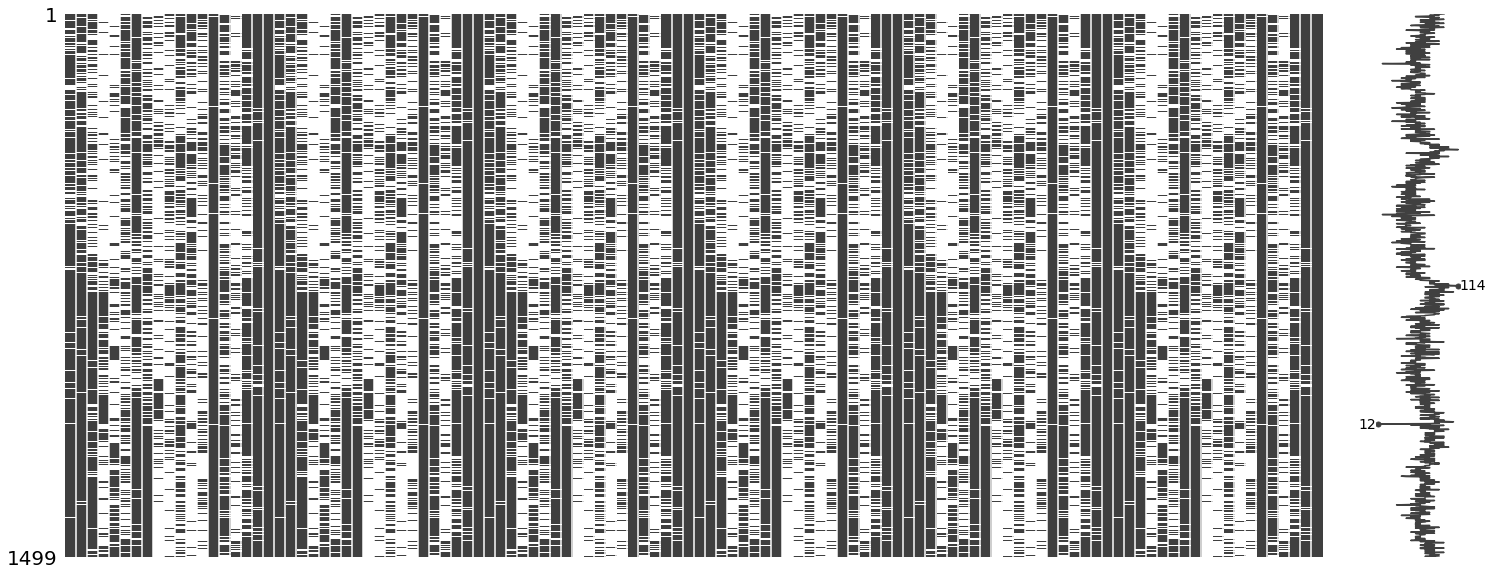

In [ ]:
mn.matrix(data)

In [ ]:
data.columns = [f'{i}{j}' for i,j in data.columns]
data

,Adj CloseAPLLTD.NS,Adj CloseAPTUS.NS,Adj CloseASIANENE.NS,Adj CloseCONSOFINVT.NS,Adj CloseELECTHERM.NS,Adj CloseKAMDHENU.NS,Adj CloseKSHITIJPOL.NS,Adj CloseMANGCHEFER.NS,Adj CloseMBLINFRA.NS,Adj CloseOILCOUNTUB.NS,...,VolumeOILCOUNTUB.NS,VolumePCJEWELLER.NS,VolumePODDARHOUS.NS,VolumePRESSMN.NS,VolumeRENUKA.NS,VolumeSALASAR.NS,VolumeSGL.NS,VolumeSUULD.NS,VolumeTTML.NS,VolumeYESBANK.NS
Datetime,,,,,,,,,,,,,,,,,,,,,
2023-03-01 09:15:00+05:30,510.049988,244.100006,56.049999,NaN,NaN,333.799988,20.900000,75.000000,16.299999,14.15,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2023-03-01 09:16:00+05:30,510.000000,243.850006,56.200001,NaN,NaN,332.100006,20.900000,74.650002,17.250000,NaN,...,NaN,104867.0,4057.0,3694.0,25737.0,0.0,NaN,239.0,100597.0,3283764.0
2023-03-01 09:17:00+05:30,510.450012,243.250000,56.000000,NaN,NaN,332.049988,20.900000,74.349998,NaN,NaN,...,NaN,221451.0,334.0,2110.0,33680.0,1196.0,NaN,653.0,69345.0,974480.0
2023-03-01 09:18:00+05:30,510.299988,243.699997,NaN,NaN,NaN,333.899994,20.900000,74.400002,17.150000,14.80,...,97.0,239918.0,156.0,1710.0,31178.0,1052.0,NaN,1936.0,60062.0,2927528.0
2023-03-01 09:19:00+05:30,510.500000,243.350006,55.950001,NaN,NaN,334.750000,20.900000,NaN,NaN,14.80,...,102.0,143522.0,148.0,671.0,20494.0,NaN,NaN,0.0,25729.0,3238288.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-06 15:25:00+05:30,525.000000,283.700012,79.199997,112.000000,64.000000,324.649994,21.549999,88.400002,NaN,NaN,...,NaN,NaN,22.0,NaN,70816.0,NaN,0.0,581.0,42.0,954955.0
2023-03-06 15:26:00+05:30,525.500000,283.700012,NaN,NaN,64.000000,324.899994,21.549999,88.099998,NaN,NaN,...,NaN,NaN,NaN,NaN,56448.0,0.0,39212.0,1290.0,637.0,401459.0
2023-03-06 15:27:00+05:30,526.750000,283.700012,NaN,112.000000,63.900002,324.899994,21.549999,88.300003,NaN,NaN,...,NaN,0.0,NaN,NaN,92099.0,2033.0,1947.0,3421.0,365.0,446912.0


In [ ]:
data['Datetime'] = list(data.index)
long_df = pd.wide_to_long(data, 
                stubnames = ['Adj Close','Close','High','Open','Low', 'Volume'], 
                i=['Datetime'], 
                j='Stock', 
                suffix= '.+', 
                sep='')

In [ ]:
long_df

,,Adj Close,Close,High,Open,Low,Volume
Datetime,Stock,,,,,,
2023-03-01 09:15:00+05:30,APLLTD.NS,510.049988,510.049988,510.049988,510.049988,510.049988,0.0
2023-03-01 09:16:00+05:30,APLLTD.NS,510.000000,510.000000,511.049988,510.000000,510.000000,60.0
2023-03-01 09:17:00+05:30,APLLTD.NS,510.450012,510.450012,510.850006,510.000000,509.350006,81.0
2023-03-01 09:18:00+05:30,APLLTD.NS,510.299988,510.299988,510.299988,509.450012,509.450012,49.0
2023-03-01 09:19:00+05:30,APLLTD.NS,510.500000,510.500000,510.500000,510.500000,510.500000,21.0
...,...,...,...,...,...,...,...
2023-03-06 15:25:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,954955.0
2023-03-06 15:26:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,401459.0
2023-03-06 15:27:00+05:30,YESBANK.NS,16.900000,16.900000,16.900000,16.900000,16.850000,446912.0


<AxesSubplot:>

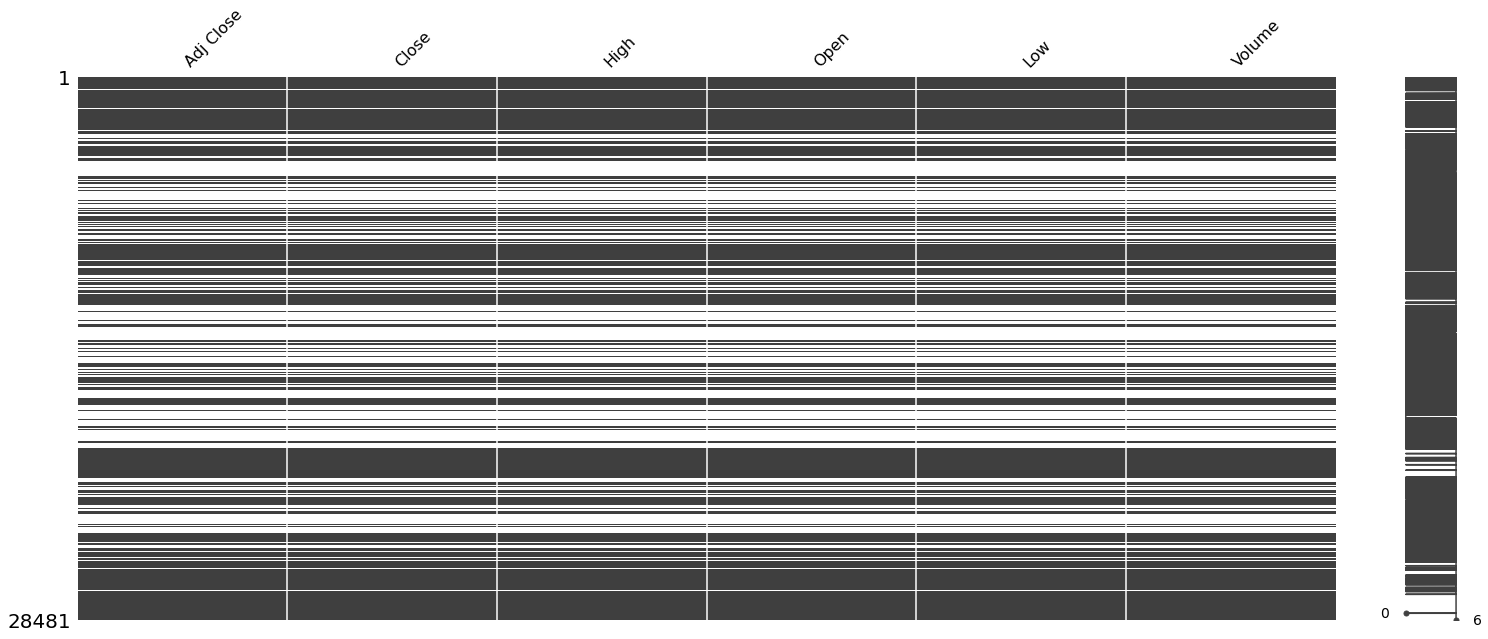

In [ ]:
mn.matrix(long_df)

In [ ]:
yf.pdr_override()

data2 = pdr.get_data_yahoo(stock_list, start="2023-03-01", end="2023-03-08",interval="30m")

[*********************100%***********************]  19 of 19 completed


<AxesSubplot:>

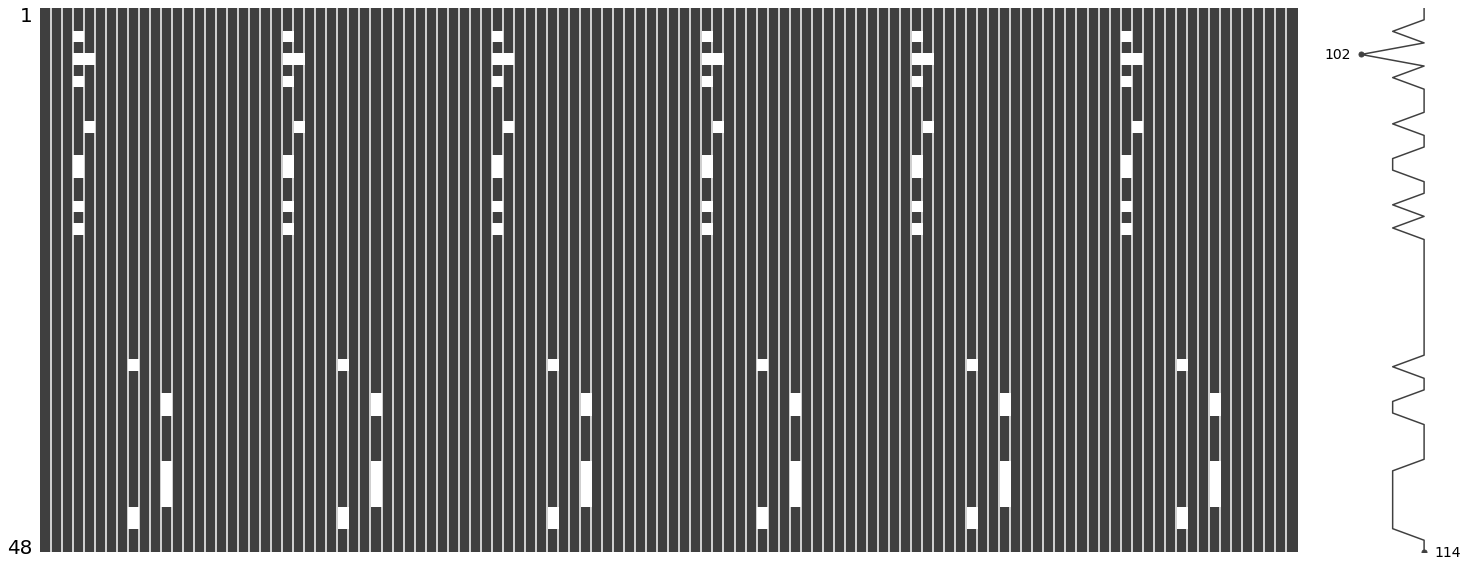

In [ ]:
mn.matrix(data2)

In [ ]:
data2.columns = [f'{i}{j}' for i,j in data2.columns]

In [ ]:
data2['Datetime'] = list(data2.index)
long_df2 = pd.wide_to_long(data2, 
                stubnames = ['Adj Close','Close','High','Open','Low', 'Volume'], 
                i=['Datetime'], 
                j='Stock', 
                suffix= '.+', 
                sep='')

In [ ]:
long_df2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 912 entries, (Timestamp('2023-03-01 09:30:00'), 'APLLTD.NS') to (Timestamp('2023-03-06 15:00:00'), 'YESBANK.NS')
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  894 non-null    float64
 1   Close      894 non-null    float64
 2   High       894 non-null    float64
 3   Open       894 non-null    float64
 4   Low        894 non-null    float64
 5   Volume     894 non-null    float64
dtypes: float64(6)
memory usage: 79.0+ KB


<AxesSubplot:>

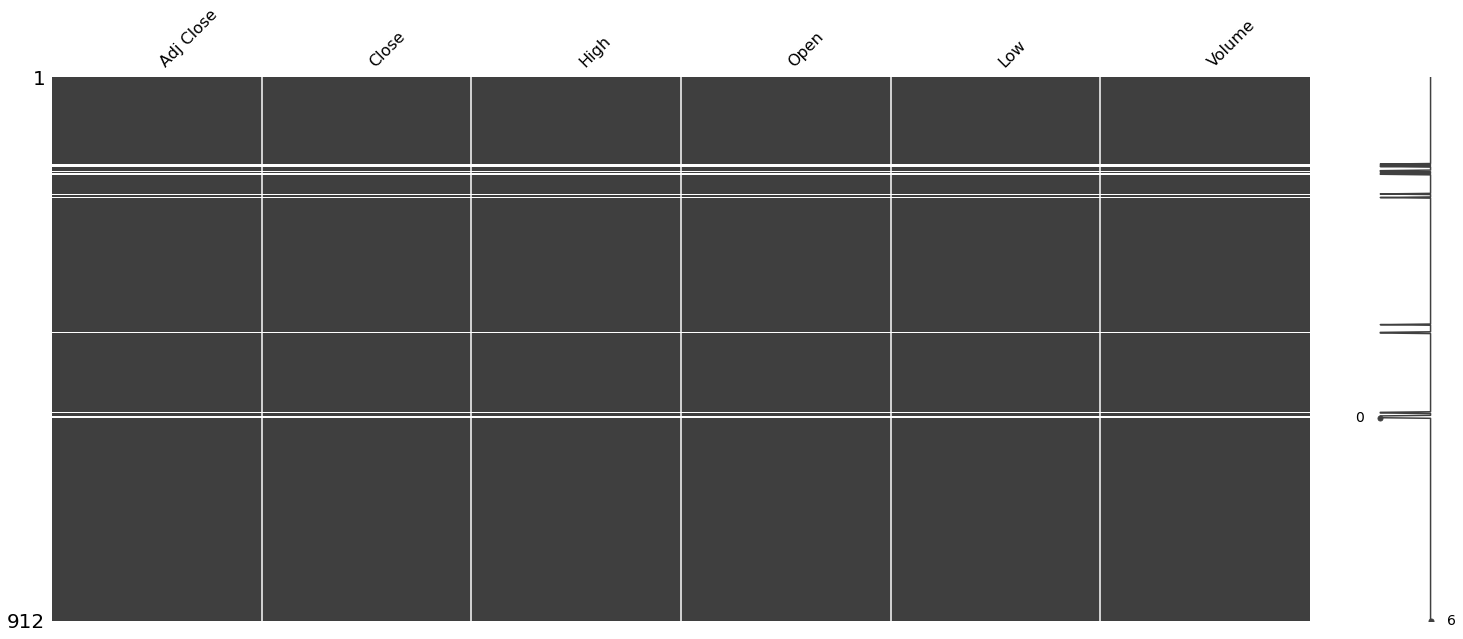

In [ ]:
mn.matrix(long_df2)

---
### Finding Circuit Points


In [ ]:
yf.pdr_override()

data2 = pdr.get_data_yahoo('SALASAR.NS', start="2023-03-04", end="2023-03-11",interval="1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data2

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,43.000000,47.150002,41.900002,47.150002,47.150002,1196712
2023-03-08,48.299999,50.400002,46.200001,48.200001,48.200001,2056660
2023-03-09,48.599998,50.200001,44.400002,46.500000,46.500000,892558
2023-03-10,46.599998,49.000000,46.200001,47.849998,47.849998,1065647


In [ ]:
a=np.zeros((len(data2),1))
data2['high_min_preclose%'] = a 
for i in range(1,len(data2)):
  data2['high_min_preclose%'][i] = ((data2['High'][i] - data2['Close'][i-1] )/(data2['Close'][i-1]))*100 
data2

<ipython-input-23-40461121477c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['high_min_preclose%'][i] = ((data2['High'][i] - data2['Close'][i-1] )/(data2['Close'][i-1]))*100


,Open,High,Low,Close,Adj Close,Volume,high_min_preclose%
Date,,,,,,,
2023-03-06,43.000000,47.150002,41.900002,47.150002,47.150002,1196712,0.000000
2023-03-08,48.299999,50.400002,46.200001,48.200001,48.200001,2056660,6.892895
2023-03-09,48.599998,50.200001,44.400002,46.500000,46.500000,892558,4.149378
2023-03-10,46.599998,49.000000,46.200001,47.849998,47.849998,1065647,5.376344


In [ ]:
def circuit(column):
    if column["high_min_preclose%"] >=5:
        cirpt= (column['Open']+column['Close'])/2
        return cirpt
    elif column["high_min_preclose%"]<=-5:
        cirpt= (column['Open']+column['Close'])/2
        return cirpt
    else:
      return 0
data2 = data2.assign(circuit=data2.apply(circuit, axis=1))
print(data2)

                 Open       High        Low      Close  Adj Close   Volume  \
Date                                                                         
2023-03-06  43.000000  47.150002  41.900002  47.150002  47.150002  1196712   
2023-03-08  48.299999  50.400002  46.200001  48.200001  48.200001  2056660   
2023-03-09  48.599998  50.200001  44.400002  46.500000  46.500000   892558   
2023-03-10  46.599998  49.000000  46.200001  47.849998  47.849998  1065647   

            high_min_preclose%    circuit  
Date                                       
2023-03-06            0.000000   0.000000  
2023-03-08            6.892895  48.250000  
2023-03-09            4.149378   0.000000  
2023-03-10            5.376344  47.224998  


In [ ]:
def extractData(data):
  if data['circuit']!=0:
    yf.pdr_override()
    Min_data = pdr.get_data_yahoo('SALASAR.NS', start= data.index, end=pd.to_datetime(data.index) + timedelta(days=1),interval="1m")
    return Min_data
data2 = data2.assign(data2.apply(extractData, axis=1))
print(data2)

ParserError: ignored

In [ ]:
yf.pdr_override()
Min_data = pdr.get_data_yahoo('OBCL.NS', start='2023-03-08', end='2023-03-11',interval="5m")
Min_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-03-08 09:15:00+05:30,50.700001,51.400002,50.700001,50.950001,50.950001,0
2023-03-08 09:20:00+05:30,51.500000,51.500000,51.450001,51.450001,51.450001,505
2023-03-08 09:25:00+05:30,51.750000,51.750000,51.450001,51.549999,51.549999,804
2023-03-08 09:30:00+05:30,51.400002,51.549999,51.250000,51.549999,51.549999,235
2023-03-08 09:35:00+05:30,51.500000,51.599998,51.500000,51.599998,51.599998,52
...,...,...,...,...,...,...
2023-03-10 14:35:00+05:30,79.300003,79.300003,79.300003,79.300003,79.300003,202
2023-03-10 14:50:00+05:30,79.300003,79.300003,79.300003,79.300003,79.300003,0
2023-03-10 15:05:00+05:30,79.300003,79.300003,79.300003,79.300003,79.300003,60


In [ ]:
def Min_circuit(data):
    if data['Open'] == data['Close'] == data['High'] == data['Low']:
        cirpt= data['High']
        return cirpt
    else:
      return None
Min_data = Min_data.assign(circuit=Min_data.apply(Min_circuit, axis=1))
print(Min_data)

                                Open       High        Low      Close  \
Datetime                                                                
2023-03-08 09:15:00+05:30  50.700001  51.400002  50.700001  50.950001   
2023-03-08 09:20:00+05:30  51.500000  51.500000  51.450001  51.450001   
2023-03-08 09:25:00+05:30  51.750000  51.750000  51.450001  51.549999   
2023-03-08 09:30:00+05:30  51.400002  51.549999  51.250000  51.549999   
2023-03-08 09:35:00+05:30  51.500000  51.599998  51.500000  51.599998   
...                              ...        ...        ...        ...   
2023-03-10 14:35:00+05:30  79.300003  79.300003  79.300003  79.300003   
2023-03-10 14:50:00+05:30  79.300003  79.300003  79.300003  79.300003   
2023-03-10 15:05:00+05:30  79.300003  79.300003  79.300003  79.300003   
2023-03-10 15:15:00+05:30  79.300003  79.300003  79.300003  79.300003   
2023-03-10 15:20:00+05:30  79.300003  79.300003  79.300003  79.300003   

                           Adj Close  Volume    ci

In [ ]:
print(Min_data.groupby(['circuit']).count())

           Open  High  Low  Close  Adj Close  Volume
circuit                                             
51.450001     1     1    1      1          1       1
51.500000     1     1    1      1          1       1
51.549999     1     1    1      1          1       1
51.599998     1     1    1      1          1       1
51.650002     3     3    3      3          3       3
60.099998    12    12   12     12         12      12
72.099998    33    33   33     33         33      33
79.300003    35    35   35     35         35      35


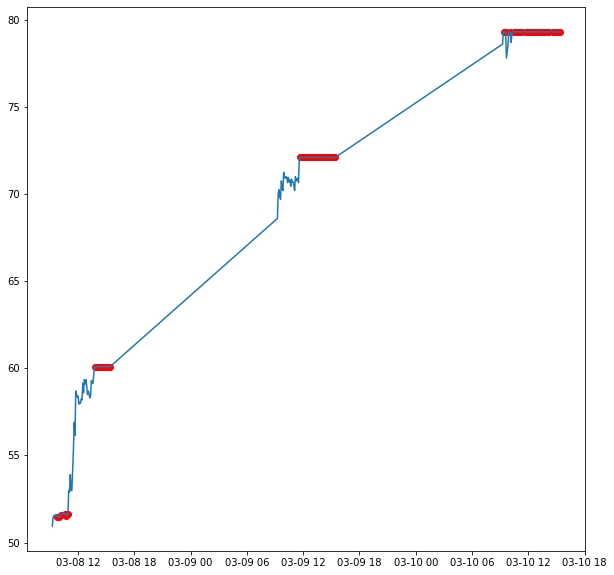

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(Min_data['Close'])
plt.scatter(Min_data.index, Min_data['circuit'], color='Red')
plt.show()

In [ ]:
def circiut_making(stock_name,i):
  Min_data = pdr.get_data_yahoo(stock_name, start='2023-03-08', end='2023-03-11',interval=i)
  Min_data = Min_data.assign(circuit=Min_data.apply(Min_circuit, axis=1))
  plt.figure(figsize=(10,10))
  plt.plot(Min_data['Close'])
  plt.scatter(Min_data.index, Min_data['circuit'], color='Red')
  plt.show()
  return Min_data

[*********************100%***********************]  1 of 1 completed


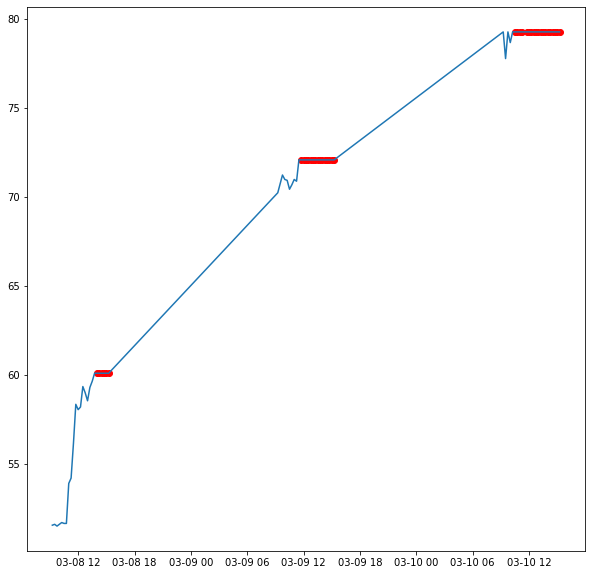

In [ ]:
data = circiut_making('OBCL.NS','15m')

In [ ]:
import datetime
data1 = data.dropna()
# d = pd.DataFrame()
for i in data1.circuit.unique():
  print(f'''For {i} 
  Start\t : {data1.query(f'circuit == {i}').head(1).index[0]}  
  End\t : {data1.query(f'circuit == {i}').tail(1).index[0] + datetime.timedelta(minutes=15)}
  Diff\t : {data1.query(f'circuit == {i}').tail(1).index[0] - data1.query(f'circuit == {i}').head(1).index[0] + datetime.timedelta(minutes=15)}  ''')
# print(d)

For 60.099998474121094 
  Start	 : 2023-03-08 14:00:00  
  End	 : 2023-03-08 15:30:00
  Diff	 : 0 days 01:30:00  
For 72.0999984741211 
  Start	 : 2023-03-09 11:45:00  
  End	 : 2023-03-09 15:30:00
  Diff	 : 0 days 03:45:00  
For 79.30000305175781 
  Start	 : 2023-03-10 10:30:00  
  End	 : 2023-03-10 15:30:00
  Diff	 : 0 days 05:00:00  


In [58]:
def find_circuits(data):
  # adding a column which show the maximum change of price in that day.
  a=np.zeros((len(data),1)) 
  a[0] = ((data['High'][0] - data['Open'][0] )/(data['Close'][0]))*100
  for i in range(1,len(data)):
    a[i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 
  data['high_preclose%'] = a

  # adding a column to set which show if circuit is there or not
  data['circuit'] = np.where(data['high_preclose%'] >= 5, 1, 0)

  # printing Dates when the circuit has happened
  print('Dates on which there is circuits')
  for date in data.query('circuit == 1').index:
    print('--->',date)
  
  plt.figure(figsize=(13,3))
  plt.plot(data['Close'])
  plt.scatter(data.query('circuit == 1').index, data.query('circuit == 1')['Close'], color='Red')
  plt.show()

  return data

In [63]:
yf.pdr_override()
Min_data = pdr.get_data_yahoo('ADANIENT.NS', start='2023-03-01', end='2023-04-01',interval="1d")
Min_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-01,1424.000000,1580.000000,1411.000000,1564.300049,1564.300049,20114340
2023-03-02,1499.900024,1646.000000,1407.900024,1607.250000,1607.250000,26970925
2023-03-03,1688.849976,1905.949951,1685.500000,1879.500000,1879.500000,22888891
2023-03-06,1966.699951,2135.000000,1855.000000,1982.900024,1982.900024,27180456
2023-03-08,2040.000000,2088.000000,1941.000000,2039.650024,2039.650024,13568243
2023-03-09,2049.800049,2068.850098,1905.349976,1953.150024,1953.150024,12627794
2023-03-10,1870.000000,1940.000000,1820.599976,1896.199951,1896.199951,9419942
2023-03-13,1917.000000,1985.000000,1857.400024,1874.400024,1874.400024,7572604
2023-03-14,1874.000000,1874.849976,1651.349976,1738.199951,1738.199951,12679663


Dates on which there is circuits
---> 2023-03-01 00:00:00
---> 2023-03-02 00:00:00
---> 2023-03-03 00:00:00
---> 2023-03-06 00:00:00
---> 2023-03-08 00:00:00
---> 2023-03-15 00:00:00
---> 2023-03-29 00:00:00


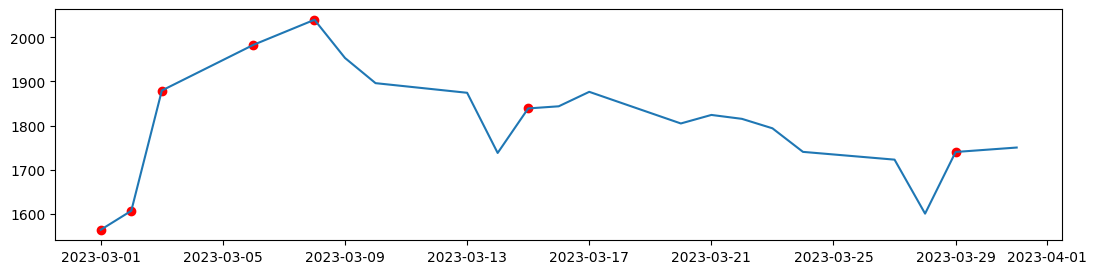

In [64]:
data = find_circuits(Min_data)
# print(data)

In [60]:
data

,Open,High,Low,Close,Adj Close,Volume,high_preclose%,circuit
Date,,,,,,,,
2023-03-01,48.950001,51.200001,48.099998,50.900002,50.900002,45323,4.420432,0
2023-03-02,51.200001,53.950001,47.500000,51.299999,51.299999,111743,5.992140,1
2023-03-03,50.950001,50.950001,48.000000,48.549999,48.549999,50492,-0.682258,0
2023-03-06,48.950001,51.250000,48.500000,50.099998,50.099998,19121,5.561279,1
2023-03-08,50.700001,60.099998,50.200001,60.099998,60.099998,158990,19.960080,1
2023-03-09,62.150002,72.099998,62.150002,72.099998,72.099998,430126,19.966723,1
2023-03-10,75.000000,79.300003,73.250000,79.300003,79.300003,455828,9.986137,1
2023-03-13,86.300003,86.900002,80.150002,83.300003,83.300003,490727,9.583856,1
2023-03-14,83.300003,83.900002,75.000000,75.000000,75.000000,111251,0.720286,0
